# By Using Diffuser Model

#Install-Required_Libraries

In [1]:
!pip install diffusers
!pip install huggingface_hub
!pip install tensorflow
!pip install matplotlib
!pip install matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.27.3
    Uninstalling protobuf-5.27.3:
      Successfully uninstalled protobuf-5.27.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.65.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.23.4 which is incompatible.
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from diffusers import DDPMPipeline, DDIMPipeline, PNDMPipeline
from huggingface_hub import from_pretrained_keras

#Load_&_configure_DDPM_model_for_Unconditional_Image_Generation

In [4]:
model_id="google/ddpm-cifar10-32"

#load_model_&-Scheduler_for_DDPM

In [5]:
ddpm=DDPMPipeline.from_pretrained(model_id)

model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/143M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

#Run_Pipeline_in_Inference_mode-(generate_random_noise_and_denoise)

In [6]:
image=ddpm().images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]

#save_generated_images_from_ddpm_pipeline


In [7]:
image.save("ddpm_generated_image.png")

# Visualise_generated_images

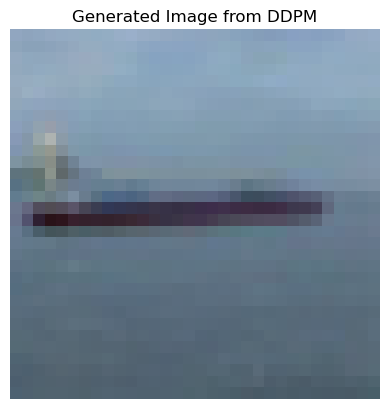

In [9]:
plt.imshow(image)
plt.axis('off')
plt.title('Generated Image from DDPM')
plt.show()

# Tensorflow_GAN_model_setup

In [10]:
seed=42 #random_seed_for_reproducibility
n_images=36 #no.of_images_to_generate
codings_size=100 #latent_vector_size(noise)

#load_pretrained_GAN_generator_model_from_Hugging_face_hub

In [11]:
generator=from_pretrained_keras("huggan/crypto-gan")

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.png:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/213k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

variables.index:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/5.35M [00:00<?, ?B/s]

In [13]:
#fn._to_generate_images_using_GAN_generator
def generate_images(generator, seed, n_images=36, codings_size=100):
    
    #generate_random_voice_vector_(latent_space_codings)
    noise=tf.random.normal(shape=[n_images, codings_size], seed=seed)
    #generate_images_from_noise
    generated_images=generator(noise, training=False)
    
    return generated_images

In [14]:
#genearate_images_from_pre-trained_generator
generated_images=genarate_images(generator, seed, n_images=n_images, codings_size=codings_size)

#plot_generated_images_in_grid_format

In [15]:
def plot_generated_images(images, n_images, rows=6, cols=6):
    fig, axes=plt.subplots(rows, cols, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        img=images[i].numpy()
        ax.imshow((img*127.5+127.5).astype("uint8")) #rescale_from_[-1, 1]_to_[0, 255]
        ax.axis("off")
    plt.show()

#plot_generated_images_from_GAN

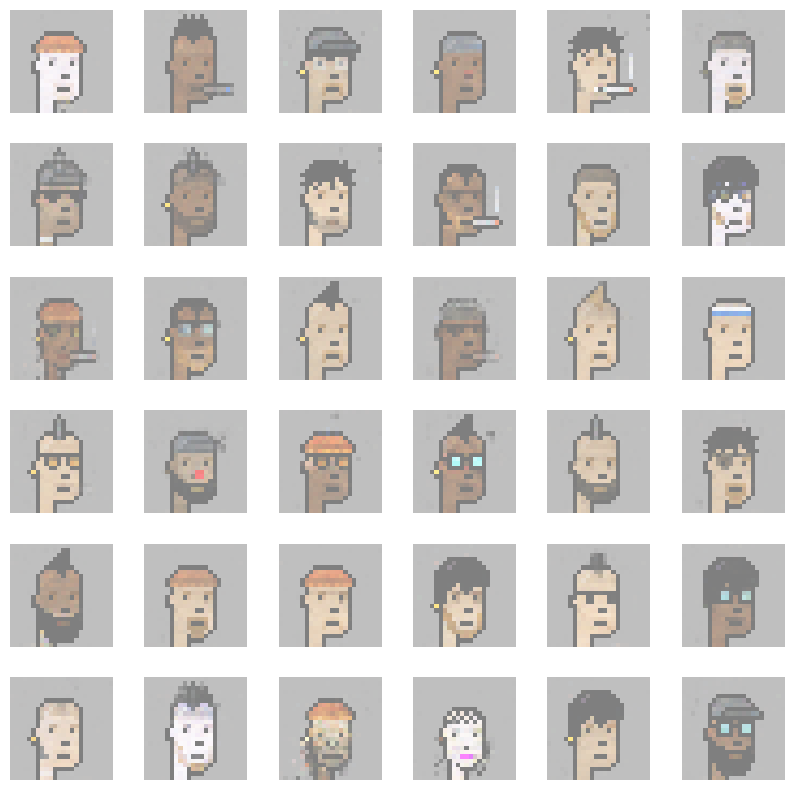

In [16]:
plot_generated_images(generated_images, n_images)

#save_generated_images

In [17]:
for i, img in enumerate(generated_images):
    plt.imsave(f"gan_generated_image_{i}.png", (img.numpy()*127.5+127.5).astype("uint8"))